In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("datasets.csv")
df.head(30)

,Unnamed: 0,studentID,personal_statement,award_name,award_classification
0,0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
2,2,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
3,3,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST
5,5,170008749,"Medicine appealed to me, as it combines my int...",Master of Science,MERIT
6,6,170011945,I want to be a doctor to help people through p...,Master of Science,MERIT
7,7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
8,8,19969003,-,Record of achievement,CRPASS
9,9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST


# 1. VIEW INFO ABOUT DATA AND CLEAN THE DATA

In [3]:
df.columns

Index(['Unnamed: 0', 'studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [4]:
# View size of data
df.shape

(16769, 5)

In [5]:
# view info about data, showing its null and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16769 entries, 0 to 16768
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            16769 non-null  int64 
 1   studentID             16769 non-null  int64 
 2   personal_statement    16768 non-null  object
 3   award_name            16769 non-null  object
 4   award_classification  16769 non-null  object
dtypes: int64(2), object(3)
memory usage: 655.2+ KB


In [6]:
# from the info above, there is a column name Unnamed that isn't needed, so we drop it.

df.columns

Index(['Unnamed: 0', 'studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.columns

Index(['studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [9]:
# view data
df.head()

,studentID,personal_statement,award_name,award_classification
0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
2,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
3,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST


In [10]:
# check for duplicates counts because there are duplicates.
df.duplicated().sum()

7395

In [11]:
# drop all duplicates and leave only first occurance of data

df = df.drop_duplicates(keep='first')
df.shape

(9374, 4)

In [12]:
# Check for NaN values
df.isnull().sum()

studentID               0
personal_statement      1
award_name              0
award_classification    0
dtype: int64

In [13]:
df['personal_statement'].isnull().values.any()

True

In [14]:
df[df.isna().any(axis=1)]

,studentID,personal_statement,award_name,award_classification
8891,201803289,NaN,Bachelor of Science with Honours,2:1


In [15]:
# since the row has no personal statement, we can drop it.
# NB: If there were many rows with no available personal statement, treating them differently will be better than dropping them.
print(f'Before dropping NA, shape is: {df.shape}')
df.dropna(inplace=True)
print(f'After dropping NA, shape is: {df.shape}')

Before dropping NA, shape is: (9374, 4)
After dropping NA, shape is: (9373, 4)


In [16]:
df.head(10)

,studentID,personal_statement,award_name,award_classification
0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST
5,170008749,"Medicine appealed to me, as it combines my int...",Master of Science,MERIT
6,170011945,I want to be a doctor to help people through p...,Master of Science,MERIT
7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
8,19969003,-,Record of achievement,CRPASS
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST
11,199922311,I want to teach because I want to share my lov...,Record of achievement,CRPASS
12,199926834,Why I am applying for adult nursing: Working i...,Record of achievement,CRPASS


In [17]:
# Get data where award names containes 'Bachelor' irrespective of the bachelor type.
df = df[df['award_name'].str.contains('Bachelor')]

df.shape

(5781, 4)

In [18]:
# Filter out HONS, MBPASS and ORD from the current data

options = ["FIRST", "2:1", "2:2", "THIRD", "PASS"]
df = df.loc[df['award_classification'].isin(options)]

In [19]:
df.head(10)

,studentID,personal_statement,award_name,award_classification
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,FIRST
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,FIRST
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,FIRST
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,2:1
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,THIRD
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,2:2
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,2:2
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,FIRST
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,2:1


In [20]:
# Get all unique awards

unique_awards = df['award_name'].unique()

len(unique_awards)

10

In [21]:
unique_awards

array(['Bachelor of Science with Honours',
       'Bachelor of Arts with Honours',
       'Bachelor of Engineering with Honours',
       'Bachelor of Laws with Honours',
       'Bachelor of Education with Honours',
       'Bachelor of Science (Economics) with Honours',
       'Bachelor of Philosophy with Honours',
       'Bachelor of Music with Honours', 'Bachelor of Arts',
       'Bachelor of Business Administration with Honours'], dtype=object)

In [22]:
# Get all unique awards_classification

award_classification = df['award_classification'].unique()

len(award_classification)

5

In [23]:
award_classification 

array(['FIRST', '2:1', 'THIRD', '2:2', 'PASS'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 9 to 16712
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   studentID             5700 non-null   int64 
 1   personal_statement    5700 non-null   object
 2   award_name            5700 non-null   object
 3   award_classification  5700 non-null   object
dtypes: int64(1), object(3)
memory usage: 222.7+ KB


# 2. EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better

In [25]:
# Knowing frequencies of award

df['award_name'].value_counts()

Bachelor of Science with Honours                    2597
Bachelor of Arts with Honours                       2497
Bachelor of Engineering with Honours                 319
Bachelor of Laws with Honours                        247
Bachelor of Education with Honours                    12
Bachelor of Music with Honours                        12
Bachelor of Philosophy with Honours                   11
Bachelor of Arts                                       2
Bachelor of Business Administration with Honours       2
Bachelor of Science (Economics) with Honours           1
Name: award_name, dtype: int64

In [26]:
# Knowing frequencies of award classification

df['award_classification'].value_counts()

2:1      2652
FIRST    1908
2:2      1012
THIRD     126
PASS        2
Name: award_classification, dtype: int64

In [27]:
# award classification before encoding
target = df['award_classification']
target.head(20)

9      FIRST
13     FIRST
15     FIRST
16     FIRST
18       2:1
40     THIRD
42       2:2
46       2:2
64     FIRST
74       2:1
80       2:2
82       2:2
85       2:1
95       2:1
104    FIRST
106      2:2
121      2:2
128      2:2
135      2:1
145      2:2
Name: award_classification, dtype: object

In [28]:
# Encoding the data labels to numerical category
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X = text

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(df['award_classification'])
df['award_classification'] = encoder.fit_transform(df['award_classification'])

# award classification after encoding
encoded_target[:30]

array([2, 2, 2, 2, 0, 4, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 0])

In [29]:
df.head(20)

,studentID,personal_statement,award_name,award_classification
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,4
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,0


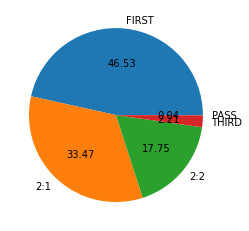

In [30]:

import matplotlib.pyplot as plt


options = ["FIRST", "2:1", "2:2", "THIRD", "PASS"]

plt.rcParams["figure.figsize"] = (8,6)
plt.pie(df['award_classification'].value_counts(), labels=options, autopct="%0.2f")
plt.show()

<AxesSubplot:xlabel='award_classification', ylabel='count'>

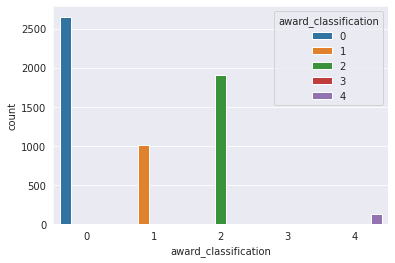

In [31]:
# Barplots of award_classification

import seaborn as sns

sns.set_style('darkgrid')

sns.countplot(x="award_classification", data=df, hue="award_classification")

In [32]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/abbracx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:

# Get number of characters
df['num_characters'] = df['personal_statement'].apply(len)

# Get number of words
df['num_words'] = df['personal_statement'].apply(lambda x: len(nltk.word_tokenize(x)))


# Get number of sentences
df['num_sentences'] = df['personal_statement'].apply(lambda x: len(nltk.sent_tokenize(x)))
                                                                                                                            

In [34]:
df.head(10)

,studentID,personal_statement,award_name,award_classification,num_characters,num_words,num_sentences
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2,3590,721,21
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2,1593,303,12
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2,1732,306,9
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2,3324,581,18
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0,3992,771,28
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,4,2368,428,16
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1,3903,699,29
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1,2662,438,16
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2,3822,717,26
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,0,3956,715,25


In [35]:
# statistical description of newly created features
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5700.000000,5700.000000,5700.000000
mean,2635.970000,486.781228,18.327368
std,1672.057098,308.567907,11.691261
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3571.500000,656.000000,22.000000
75%,3929.000000,716.000000,27.000000
max,6378.000000,1122.000000,61.000000


In [36]:
# statistical description of words for all First Class
df[df['award_classification'] == 2][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1908.000000,1908.000000,1908.000000
mean,2862.166667,525.904612,19.990566
std,1585.008259,291.145157,11.221838
min,1.000000,1.000000,1.000000
25%,2530.500000,455.500000,15.000000
50%,3705.500000,676.000000,24.000000
75%,3955.000000,719.000000,28.000000
max,6011.000000,1089.000000,61.000000


In [37]:
# statistical description of words for all 2:1
df[df['award_classification'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2652.000000,2652.000000,2652.000000
mean,2563.289593,473.805430,17.870664
std,1705.883407,315.036091,11.883831
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3543.500000,651.000000,22.000000
75%,3921.000000,713.250000,27.000000
max,6378.000000,1122.000000,49.000000


In [38]:
# statistical description of words for all THIRD
df[df['award_classification'] == 4][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,126.000000,126.000000,126.000000
mean,2764.896825,514.650794,18.126984
std,1531.465399,284.609440,10.234830
min,1.000000,1.000000,1.000000
25%,2385.000000,452.750000,12.000000
50%,3564.500000,661.000000,21.000000
75%,3871.250000,710.750000,26.000000
max,3999.000000,774.000000,35.000000


In [39]:
# statistical description of words for all 2:2
df[df['award_classification'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1012.000000,1012.000000,1012.000000
mean,2382.619565,443.302372,16.400198
std,1709.420444,318.128540,11.836293
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3350.500000,616.000000,20.000000
75%,3848.250000,708.000000,26.000000
max,5581.000000,1059.000000,49.000000


In [40]:
# statistical description of words for all PASS
df[df['award_classification'] == 3][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2.000000,2.000000,2.000000
mean,3291.500000,613.500000,25.000000
std,877.519515,132.228968,4.242641
min,2671.000000,520.000000,22.000000
25%,2981.250000,566.750000,23.500000
50%,3291.500000,613.500000,25.000000
75%,3601.750000,660.250000,26.500000
max,3912.000000,707.000000,28.000000


<Figure size 1008x720 with 0 Axes>

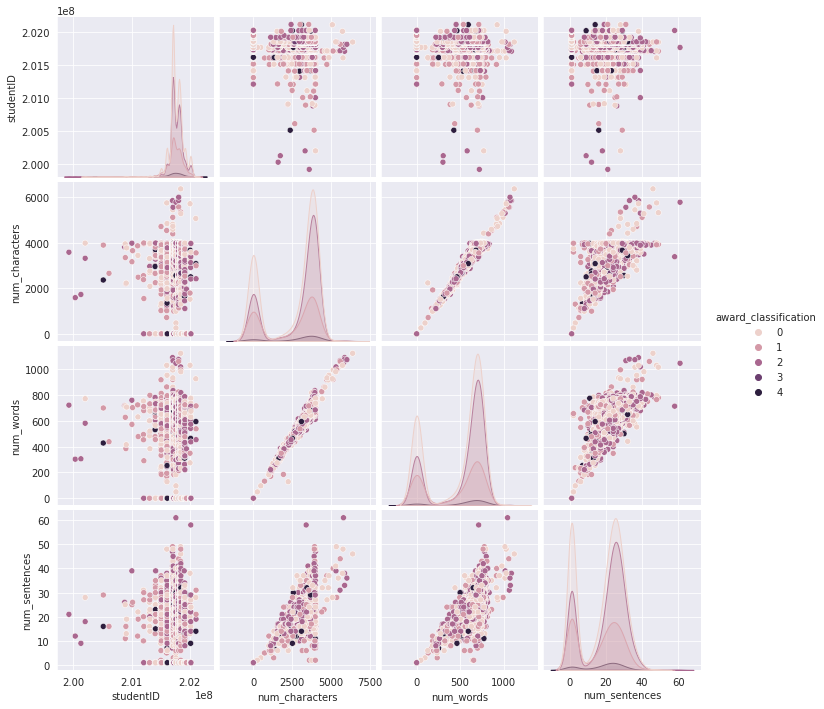

In [47]:
plt.figure(figsize=(14, 10))
sns.pairplot(df, hue='award_classification')

<AxesSubplot:>

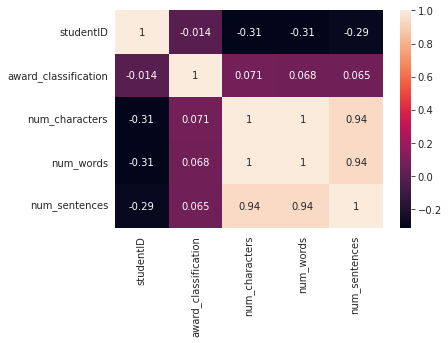

In [48]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='num_words', ylabel='Count'>

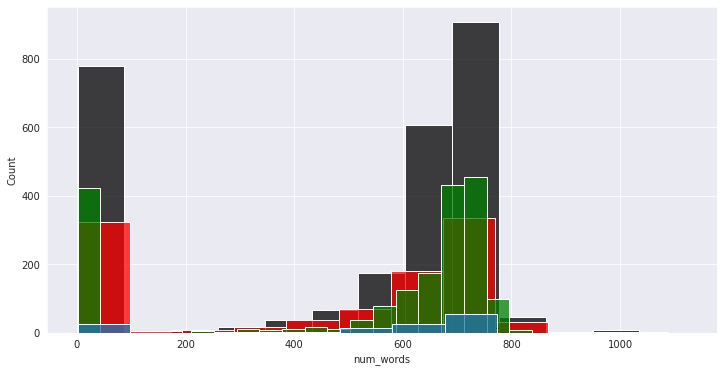

In [49]:
# Histogram plots for number of words
plt.figure(figsize=(12, 6))
sns.histplot(df[df['award_classification'] == 0]['num_words'], color='black')
sns.histplot(df[df['award_classification'] == 1]['num_words'], color='red')
sns.histplot(df[df['award_classification'] == 2]['num_words'], color='green')
sns.histplot(df[df['award_classification'] == 3]['num_words'], color='yellow')
sns.histplot(df[df['award_classification'] == 4]['num_words'])


<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

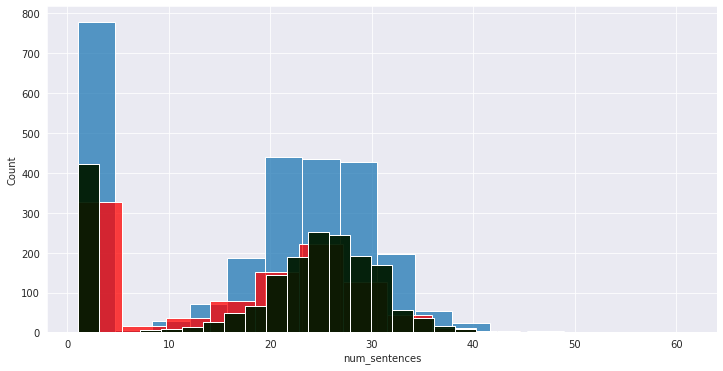

In [50]:
# Histogram plots for number of sentences
plt.figure(figsize=(12, 6))
sns.histplot(df[df['award_classification'] == 0]['num_sentences'])
sns.histplot(df[df['award_classification'] == 1]['num_sentences'], color='red')
sns.histplot(df[df['award_classification'] == 2]['num_sentences'], color='green')
sns.histplot(df[df['award_classification'] == 3]['num_sentences'], color='yellow')
sns.histplot(df[df['award_classification'] == 2]['num_sentences'], color='black')

# 3. DATA PREPROCESSING

Some of the data preprocessing steps to attain a final datasets for training are:

- Lower Casing
- Tokenization
- Removing Special Characters
- Removing Stop Words and Punctuations
- Stemming and Lemmatization


In [53]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abbracx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
''' The stopwords in nltk are the most common words in data. 
They are words that you do not want to use to describe the topic of your content.
'''
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
# view puctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [57]:
# Custom transform functions

def transform_text(text):
    # tansform to lower case and tokenize
    text = text.lower()
    text = nltk.word_tokenize(text)

    # retain only alpha-numeric words
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)

    # re-assign all newly computed values from array 'y' to text    
    text = y[:]
    y.clear()

    # filter out stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    # re-assign all newly computed values from array 'y' to text    
    text = y[:]
    y.clear()
    # reduce words to their root stems
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [62]:
# personal statement at index zero that hasn't been transformed

df.iloc[0]["personal_statement"]

'I am applying for the learning disability nursing as I feel that I am ready for a new direction/challenge in my career. I have worked with individuals with a learning disability and their friends and families for the last 16 years. I started as a care worker and worked my way up to my last post were I was a deputy manager of a residential home for adults with a learning disability. As much as I loved my job I didn\'t feel as though I was doing enough anymore as I became more office based than "hands on" and I missed the interaction with the individuals that I was caring for.an opportunity came up where I could do something about this, so after a lot of thinking it through, courage and determination I made the decision to leave my job and go back to university. I am currently doing the university certificate in health and social care practice and really enjoying the new challenge so far. I want to become a nurse so that I can support, educate and encourage individuals. I want to be abl

In [63]:
# transform the sentence at index zero that has been transformed 

trans_sentence = transform_text(df.iloc[0]["personal_statement"])

trans_sentence

'appli learn disabl nurs feel readi new career work individu learn disabl friend famili last 16 year start care worker work way last post deputi manag residenti home adult learn disabl much love job feel though enough anymor becam offic base hand miss interact individu care opportun came could someth lot think courag determin made decis leav job go back univers current univers certif health social care practic realli enjoy new challeng far want becom nurs support educ encourag individu want abl help individu learn disabl understand health need also help around understand commun engag individu learn disabl health set also commun career far gain lot skill knowledg take forward nurs career build progress skill knowledg also help day day life includ commun awar commun take mani form verbal non verbal commun someon difficulti commun back start build relationship trust respect abl pick non verbal cue behaviour start understand commun abl relat peopl age help teach encourag individu develop s

In [64]:
# transform all documents

df['transformed_personal_statement'] = df['personal_statement'].apply(transform_text)

df.head(20)

,studentID,personal_statement,award_name,award_classification,num_characters,num_words,num_sentences,transformed_personal_statement
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2,3590,721,21,appli learn disabl nurs feel readi new career ...
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2,1593,303,12,wish appli univers year want pursu life long i...
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2,1732,306,9,work mainstream special educ thirti year altho...
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2,3324,581,18,approxim six year old rememb sit coffe shop mu...
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0,3992,771,28,left school 1994 knew want career health care ...
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,4,2368,428,16,look forward get teach recent complet degre bu...
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1,3903,699,29,nurs perspect divers profess vast opportun per...
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1,2662,438,16,enthusiast nurs profess feel requisit skill de...
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2,3822,717,26,nurs invalu profess reward challeng believ nur...
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,0,3956,715,25,passion nurs come wit phenomen care nanna rece...


In [71]:
df.head()['transformed_personal_statement']

9     appli learn disabl nurs feel readi new career ...
13    wish appli univers year want pursu life long i...
15    work mainstream special educ thirti year altho...
16    approxim six year old rememb sit coffe shop mu...
18    left school 1994 knew want career health care ...
Name: transformed_personal_statement, dtype: object

In [73]:
'''
    Using wordcloud to visualize degree of importance of words.
    
    Word Cloud is a data visualization technique used for representing text data in which 
    the size of each word indicates its frequency or importance. 
    
    Significant textual data points can be highlighted using a word cloud.
    
    Word clouds are widely used for analyzing data from social network websites.
'''

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

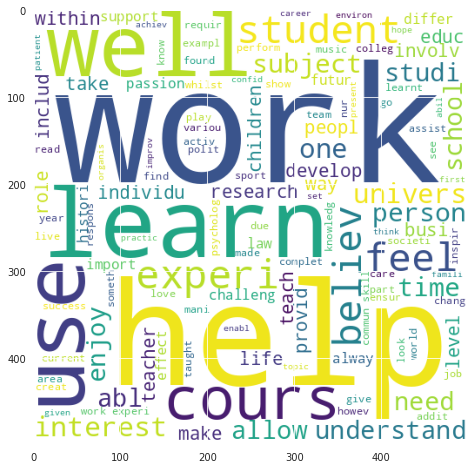

In [76]:
# degree of importance of words classified as 2:1

two_one_wc = wc.generate(df[df['award_classification'] == 0]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(two_one_wc)

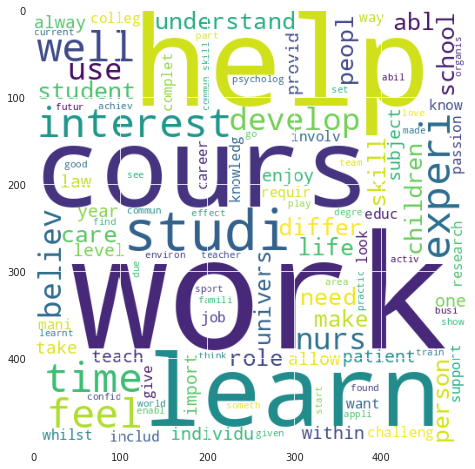

In [79]:
# degree of importance of words classified as 2:2

two_two_wc = wc.generate(df[df['award_classification'] == 1]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(two_two_wc)

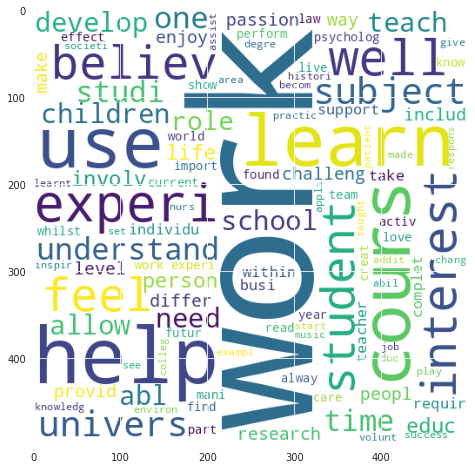

In [81]:
# degree of importance of words classified as First class

first_class_wc = wc.generate(df[df['award_classification'] == 2]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(first_class_wc)

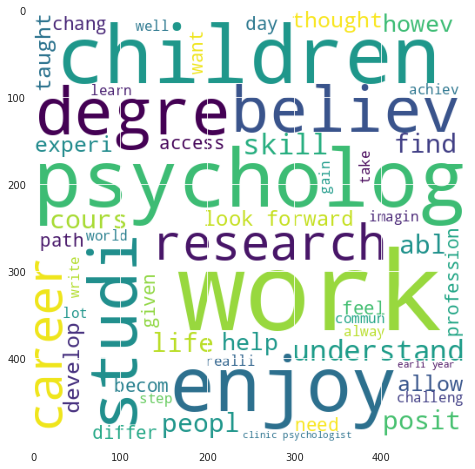

In [82]:
# degree of importance of words classified as PASS

pass_wc = wc.generate(df[df['award_classification'] == 3]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(pass_wc)

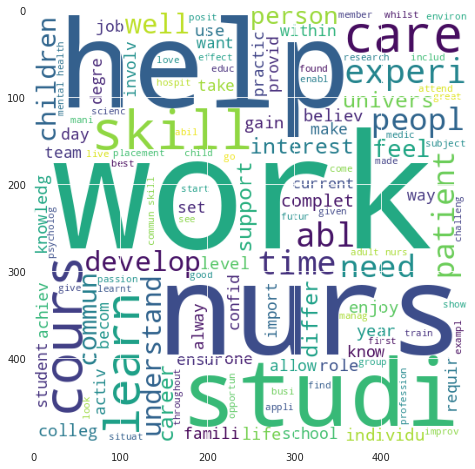

In [83]:
# degree of importance of words classified as THIRD

third_wc = wc.generate(df[df['award_classification'] == 4]['transformed_personal_statement'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(third_wc)

## A. Box-plot of Two-One, to show degree of importance of words

In [95]:
from collections import Counter

In [96]:
two_one_corpus = []
for msg in df[df['award_classification'] ==0]['transformed_personal_statement'].tolist():
    for word in msg.split():
        two_one_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


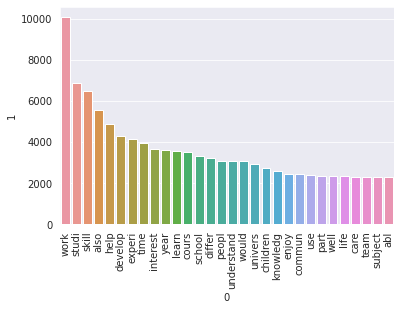

In [97]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(two_one_corpus).most_common(30))[0],pd.DataFrame(Counter(two_one_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## B. Box-plot of Two-Two, to show degree of importance of words

In [98]:
two_two_corpus = []
for msg in df[df['award_classification'] ==1]['transformed_personal_statement'].tolist():
    for word in msg.split():
        two_two_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


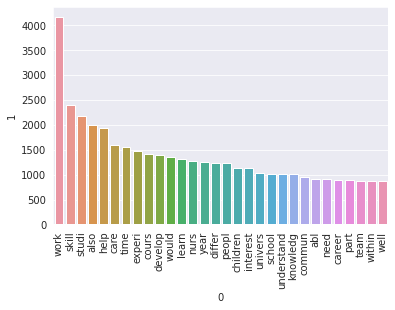

In [99]:
sns.barplot(pd.DataFrame(Counter(two_two_corpus).most_common(30))[0],pd.DataFrame(Counter(two_two_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## C. Box-plot of First Class, to show degree of importance of words

In [94]:
first_class_corpus = []
for msg in df[df['award_classification'] == 2]['transformed_personal_statement'].tolist():
    for word in msg.split():
        first_class_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


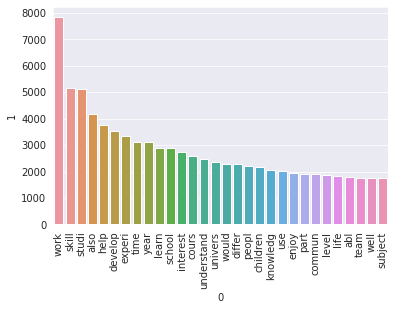

In [100]:
sns.barplot(pd.DataFrame(Counter(first_class_corpus).most_common(30))[0],pd.DataFrame(Counter(first_class_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## D. Box-plot of PASS, to show degree of importance of words

In [101]:
pass_corpus = []
for msg in df[df['award_classification'] == 3]['transformed_personal_statement'].tolist():
    for word in msg.split():
        pass_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


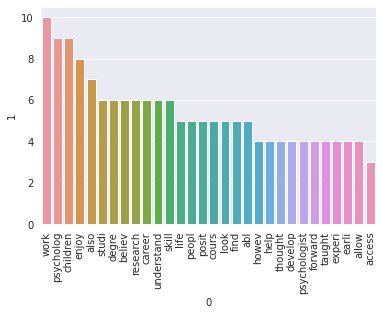

In [103]:
sns.barplot(pd.DataFrame(Counter(pass_corpus).most_common(30))[0],pd.DataFrame(Counter(pass_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## E. Box-plot of Third class, to show degree of importance of words


In [104]:
third_corpus = []
for msg in df[df['award_classification'] == 4]['transformed_personal_statement'].tolist():
    for word in msg.split():
        third_corpus.append(word)

/home/abbracx/Documents/data_science/sentiment-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


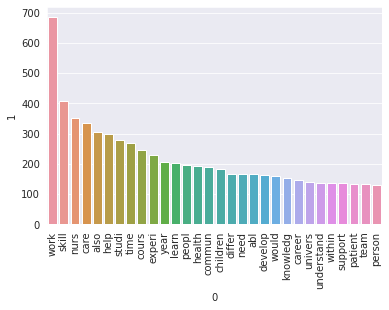

In [105]:
sns.barplot(pd.DataFrame(Counter(third_corpus).most_common(30))[0],pd.DataFrame(Counter(third_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building